In [1]:
!pip install librosa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename = 'C:/Users/Vishwak/Desktop/Machine Learning/dataset/UrbanSound8K/dog_bark.wav'

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

In [5]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is ECB3-E68A

 Directory of C:\Users\Vishwak\Desktop\python_jupy

08-06-2022  23:02    <DIR>          .
08-06-2022  23:02    <DIR>          ..
07-06-2022  20:49    <DIR>          .ipynb_checkpoints
08-06-2022  22:30         5,310,294 audio_dataset.csv
08-06-2022  22:53         6,453,887 audio_dataset1.csv
08-06-2022  23:02           235,668 Untitled.ipynb
               3 File(s)     11,999,849 bytes
               3 Dir(s)  31,887,343,616 bytes free


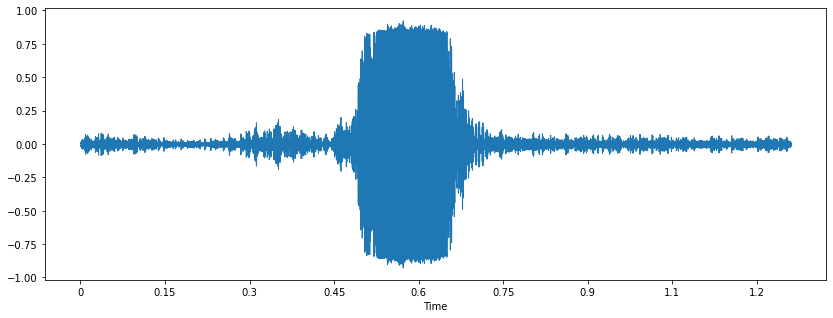

In [7]:
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr = sample_rate)
ipd.Audio(filename)

In [8]:
data # data ko 0 se 1 beech m laa dega 
sample_rate  # koi bhi ho mono ya sterio audio data sabko 22050 ke sample rate me convert kr dega

22050

In [9]:
from scipy.io import wavfile as wav
wav_sam_rate, wav_data = wav.read(filename)

In [10]:
wav_sam_rate

48000

In [11]:
wav_data

array([251, 252, 216, ..., 183, 202, 212], dtype=int16)

In [12]:
import pandas as pd
metadata = pd.read_csv('C:/Users/Vishwak/Desktop/Machine Learning/dataset/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [13]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [14]:
mfcc = librosa.feature.mfcc(y = data, sr = sample_rate, n_mfcc=40)
print(mfcc.shape)
mfcc

(40, 55)


array([[-3.26120911e+02, -2.87481323e+02, -2.88588440e+02, ...,
        -2.81511200e+02, -2.96606415e+02, -3.31466003e+02],
       [ 1.21386200e+02,  1.28226242e+02,  1.23026482e+02, ...,
         1.14520233e+02,  1.18966522e+02,  1.13534584e+02],
       [ 2.57823257e+01,  3.20831070e+01,  4.12791176e+01, ...,
         3.07787552e+01,  3.38612633e+01,  3.83843613e+01],
       ...,
       [-3.81876016e+00, -3.99646401e+00, -6.15448570e+00, ...,
         2.25780773e+00,  1.05181372e+00, -5.08513927e+00],
       [ 2.17344189e+00, -1.59330535e+00,  2.94548631e-01, ...,
        -1.92329001e+00, -2.27865577e-01, -3.15778542e+00],
       [-4.09465981e+00, -4.62369156e+00, -2.88111687e+00, ...,
        -8.10209846e+00, -8.60488129e+00, -6.65694046e+00]], dtype=float32)

In [15]:
import os
audio_dataset_path = 'C:/Users/Vishwak/Desktop/Machine Learning/dataset/UrbanSound8K/audio/'

In [16]:
def feature_extractor(file_n):
    audio_data, sample_rate = librosa.load(file_n, res_type = 'kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y = audio_data, sr = sample_rate, n_mfcc = 40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)
    
    return mfccs_scaled_features

In [17]:
import numpy as np
from tqdm import tqdm

extracted_features = []

for index, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row['fold']) +
                            '/', str(row['slice_file_name']))
    label = row["class"]
    
    features = feature_extractor(file_name)
    extracted_features.append([features, label])



3555it [04:56, 14.49it/s]C:\Users\Vishwak\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8323it [11:06, 23.82it/s]C:\Users\Vishwak\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8327it [11:06, 27.42it/s]C:\Users\Vishwak\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [11:34, 12.58it/s]


In [28]:
import numpy as np
from tqdm import tqdm

extracted_featuress = []
extracted_label = []

for index, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row['fold']) +
                            '/', str(row['slice_file_name']))
    label = row["class"]
    
    features = feature_extractor(file_name)
    extracted_featuress.append(features)
    extracted_label.append(label)

3555it [05:26, 12.75it/s]C:\Users\Vishwak\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [12:25, 17.34it/s]C:\Users\Vishwak\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\Vishwak\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [12:53, 11.29it/s]


In [19]:
extracted_features

[[array([-2.1818938e+02,  7.1385490e+01, -1.3149442e+02, -5.2258919e+01,
         -2.2106577e+01, -2.1909658e+01, -1.1460048e+01,  1.8722717e+01,
          6.4100842e+00,  1.4377757e+01, -1.2035481e+01,  1.9690273e+00,
         -1.7309101e+01,  9.7747068e+00, -5.8458338e+00, -1.5289921e+00,
         -1.7429775e+01,  1.0425411e+00, -4.1709471e+00,  7.3335228e+00,
         -1.1701521e+01, -7.4281230e+00,  5.4550529e+00, -2.9434781e+00,
         -5.9815211e+00, -2.3365971e-01, -3.4048653e+00,  4.3616667e+00,
         -6.0568323e+00, -5.6260595e+00,  1.0876640e+00,  6.8657212e+00,
         -2.0219393e-01,  1.6815262e+00, -5.6556249e+00, -2.8866239e+00,
          3.0454185e+00, -1.5696379e+00, -7.5472206e-01,  5.3398484e-01],
        dtype=float32),
  'dog_bark'],
 [array([-4.2505234e+02,  1.1067095e+02, -5.4192833e+01,  6.2045406e+01,
         -8.0949646e-01,  1.8250065e+01,  1.3709183e+00,  1.1245089e+01,
         -1.7269320e+00,  1.2430031e+01, -1.1121562e+01,  2.0790579e+01,
         -9

In [25]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ['feature', 'class'])
extracted_features_df.head()


,feature,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045406,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.656853, 54.170742,...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing


In [29]:
extracted_featuress

[array([-2.1818938e+02,  7.1385490e+01, -1.3149442e+02, -5.2258919e+01,
        -2.2106577e+01, -2.1909658e+01, -1.1460048e+01,  1.8722717e+01,
         6.4100842e+00,  1.4377757e+01, -1.2035481e+01,  1.9690273e+00,
        -1.7309101e+01,  9.7747068e+00, -5.8458338e+00, -1.5289921e+00,
        -1.7429775e+01,  1.0425411e+00, -4.1709471e+00,  7.3335228e+00,
        -1.1701521e+01, -7.4281230e+00,  5.4550529e+00, -2.9434781e+00,
        -5.9815211e+00, -2.3365971e-01, -3.4048653e+00,  4.3616667e+00,
        -6.0568323e+00, -5.6260595e+00,  1.0876640e+00,  6.8657212e+00,
        -2.0219393e-01,  1.6815262e+00, -5.6556249e+00, -2.8866239e+00,
         3.0454185e+00, -1.5696379e+00, -7.5472206e-01,  5.3398484e-01],
       dtype=float32),
 array([-4.2505234e+02,  1.1067095e+02, -5.4192833e+01,  6.2045406e+01,
        -8.0949646e-01,  1.8250065e+01,  1.3709183e+00,  1.1245089e+01,
        -1.7269320e+00,  1.2430031e+01, -1.1121562e+01,  2.0790579e+01,
        -9.0214500e+00,  1.2891243e+01, 

In [30]:
extracted_label

['dog_bark',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'air_conditioner',
 'dog_bark',
 'dog_bark',
 'do

In [31]:
dict = {'features' : extracted_featuress, "class" : extracted_label}
dict


{'features': [array([-2.1818938e+02,  7.1385490e+01, -1.3149442e+02, -5.2258919e+01,
         -2.2106577e+01, -2.1909658e+01, -1.1460048e+01,  1.8722717e+01,
          6.4100842e+00,  1.4377757e+01, -1.2035481e+01,  1.9690273e+00,
         -1.7309101e+01,  9.7747068e+00, -5.8458338e+00, -1.5289921e+00,
         -1.7429775e+01,  1.0425411e+00, -4.1709471e+00,  7.3335228e+00,
         -1.1701521e+01, -7.4281230e+00,  5.4550529e+00, -2.9434781e+00,
         -5.9815211e+00, -2.3365971e-01, -3.4048653e+00,  4.3616667e+00,
         -6.0568323e+00, -5.6260595e+00,  1.0876640e+00,  6.8657212e+00,
         -2.0219393e-01,  1.6815262e+00, -5.6556249e+00, -2.8866239e+00,
          3.0454185e+00, -1.5696379e+00, -7.5472206e-01,  5.3398484e-01],
        dtype=float32),
  array([-4.2505234e+02,  1.1067095e+02, -5.4192833e+01,  6.2045406e+01,
         -8.0949646e-01,  1.8250065e+01,  1.3709183e+00,  1.1245089e+01,
         -1.7269320e+00,  1.2430031e+01, -1.1121562e+01,  2.0790579e+01,
         -9.02

In [32]:
df1 = pd.DataFrame(dict)
df1.head()

,features,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045406,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.656853, 54.170742,...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing


In [43]:
np.array(df1['features'].tolist()).shape

(8732, 40)

In [57]:
!pip install pandas==1.3.5 --user


'1.4.2'

In [58]:
pd.__version__

'1.4.2'

In [48]:
import pandas as pd
df1.to_pickle("a_file.pkl")
df2 = pd.read_pickle("a_file.pkl")



In [54]:
 pd.show_versions()

C:\Users\Vishwak\anaconda3\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 4bfe3d07b4858144c219b9346329027024102ab6
python           : 3.9.12.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19044
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_India.1252

pandas           : 1.4.2
numpy            : 1.21.5
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 61.2.0
Cython           : 0.29.28
pytest           : 7.1.1
hypothesis       : None
sphinx           : 4.4.0
blosc            : None
feather          : None
xlsxwriter       : 3.0.3
lxml.etree       : 4.8.0
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 8.2.0
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : 1.3.4
brotl

In [49]:
df2

,features,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045406,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.656853, 54.170742,...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing
...,...,...
8727,"[-399.52393, 136.84413, -51.977036, 37.01486, ...",car_horn
8728,"[-347.32773, 87.53586, -46.2994, 52.748062, -3...",car_horn
8729,"[-304.84702, 112.69567, -47.21992, 37.061134, ...",car_horn
8730,"[-345.06885, 126.78658, -56.18254, 36.07703, -...",car_horn


In [51]:
X = np.array(df2['features'].tolist())
y = np.array(df2['class'].tolist())

In [52]:
X.shape

(8732, 40)

In [68]:
df1.to_csv('audio_dataset1.csv', index = False)

In [70]:
df = pd.read_csv('audio_dataset1.csv')

df.head()

,features,class
0,"[array([-2.1818938e+02, 7.1385490e+01, -1.314...",['dog_bark']
1,"[array([-4.2505234e+02, 1.1067095e+02, -5.419...",['children_playing']
2,"[array([-4.5982623e+02, 1.2282864e+02, -4.790...",['children_playing']
3,"[array([-4.1482184e+02, 1.0294826e+02, -3.665...",['children_playing']
4,"[array([-4.4760776e+02, 1.1508627e+02, -5.374...",['children_playing']
